## Order switching greedy algorithm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import ps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
ss = ps.Schedule()
ss.load_data(8)

In [5]:
request = 0
bathset = 0

tb_prev = [0 for _ in range(3)]
ts_prev = [0]
tf_prev = 0

tb = [0 for _ in range(ss.M)]
ts = [0 for _ in range(ss.H)]
tf = [0]

if bathset == 0:
    start = 0
    end = ss.b[bathset] # don't subtract 1, so it is included in the range

else:
    start = ss.b[bathset - 1]
    end = ss.b[bathset]

for j in range(start, end):
    
    if j == 0:
        
        if j + 1 in ss.b: # next to bath 0 is drying step h
            tb[0] = ts_prev[0]
            ts[0] = tb[0] + ss.tin[request][0]
            
        else:
            tb[0] = tb_prev[1]
        
    elif j < ss.M - 1:
        
        if j in ss.b: # bath j is preceded by a drying step
            
            if j + 1 in self.b:
                
                tb[j] = max(ts[bathset - 1] + ss.sec[request][bathset - 1], ts_prev[bathset])
                ts[bathset] = tb[j] + ss.tin[request][j]
                
            else:
                tb[j] = max(ts[bathset - 1] + ss.sec[request][bathset - 1], tb_prev[j + 1])
            
        else:
            
            if j + 1 in ss.b:
                tb[j] = max(tb[j - 1] + ss.tin[request][j - 1], ts_prev[bathset - 1])
                ts[bathset] = tb[j] + ss.tin[request][j]
                
            else:
                tb[j] = max(tb[j - 1] + ss.tin[request][j - 1], tb_prev[j + 1])
                
            if tb[j] - tb[j - 1] > ss.tax[request][j - 1]:
                
                dif = tb[j] - tb[j - 1] - ss.tax[request][j - 1]
                
                for k in reversed(range(start, j)):
                    if k in ss.b or k == 0:
                        tb[k:j] += dif
                        break
                    else:
                        shift = tb[k] + tb[k - 1] + ss.tax[request][k - 1]
                        tb[k:j] += min(dif, shift)
                        dif -= shift
                        if dif <= 0:
                            break
                            
            
    else:
        
        if j in ss.b:
            tb[j] = max(ts[bathset - 1] + ss.sec[request][bathset - 1], tf_prev)
            
        else:
            tb[j] = max(tb[j - 1] + ss.tin[request][j - 1], tf_prev)
            
            if tb[j] - tb[j - 1] > ss.tax[request][j - 1]:
                
                dif = tb[j] - tb[j - 1] - ss.tax[request][j - 1]
                
                for k in reversed(range(start, j)):
                    if k in ss.b or k == 0:
                        tb[k:j] += dif
                        break
                    else:
                        shift = tb[k] + tb[k - 1] + ss.tax[request][k - 1]
                        tb[k:j] += min(dif, shift)
                        dif -= shift
                        if dif <= 0:
                            break
        
    if bathset == ss.H:
        tf = tb[ss.M - 1] + ss.tin[request][ss.M - 1]
        
        

In [5]:
request = 0
bathset = 0

TB = [None for _ in range(ss.N)]
TS = [None for _ in range(ss.N)]
TF = [None for _ in range(ss.N)]

i_prev = 0
TB[0] = [0 for _ in range(ss.M)]
TS[0] = [0 for _ in range(ss.H)]
TF[0] = 0

for i in range(ss.N):
    
    tb = np.zeros(shape=(ss.M))
    ts = np.zeros(shape=(ss.H))
    tf = 0
    
    tb_prev = TB[i_prev].copy()
    ts_prev = TS[i_prev].copy()
    tf_prev = TF[i_prev]

    if bathset == 0:
        start = 0
        end = ss.b[bathset] # don't subtract 1, so it is included in the range

    else:
        start = ss.b[bathset - 1]
        end = ss.b[bathset]

    for j in range(start, end):

        if j == 0:

            if j + 1 in ss.b: # next to bath 0 is drying step h
                tb[0] = ts_prev[0]
                ts[0] = tb[0] + ss.tin[i][0]

            else:
                tb[0] = tb_prev[1]

        elif j < ss.M - 1:

            if j in ss.b: # bath j is preceded by a drying step

                if j + 1 in ss.b:

                    tb[j] = max(ts[bathset - 1] + ss.sec[i][bathset - 1], ts_prev[bathset])
                    ts[bathset] = tb[j] + ss.tin[i][j]

                else:
                    tb[j] = max(ts[bathset - 1] + ss.sec[i][bathset - 1], tb_prev[j + 1])

            else:

                if j + 1 in ss.b:
                    tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], ts_prev[bathset - 1])
                    ts[bathset] = tb[j] + ss.tin[i][j]

                else:
                    tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tb_prev[j + 1])

                if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                    dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                    for k in reversed(range(start, j)):
                        if k in ss.b or k == 0:
                            tb[k:j] += dif
                            break
                        else:
                            shift = tb[k] + tb[k - 1] + ss.tax[i][k - 1]
                            tb[k:j] += min(dif, shift)
                            dif -= shift
                            if dif <= 0:
                                break


        else:

            if j in ss.b:
                tb[j] = max(ts[bathset - 1] + ss.sec[i][bathset - 1], tf_prev)

            else:
                tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tf_prev)

                if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                    dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                    for k in reversed(range(start, j)):
                        if k in ss.b or k == 0:
                            tb[k:j] += dif
                            break
                        else:
                            shift = tb[k] + tb[k - 1] + ss.tax[i][k - 1]
                            tb[k:j] += min(dif, shift)
                            dif -= shift
                            if dif <= 0:
                                break

        if bathset == ss.H:
            tf = tb[ss.M - 1] + ss.tin[i][ss.M - 1]
        
        i_prev = i
        TB[i], TS[i], TF[i] = tb.copy(), ts.copy(), tf
        

NameError: name 'TB' is not defined

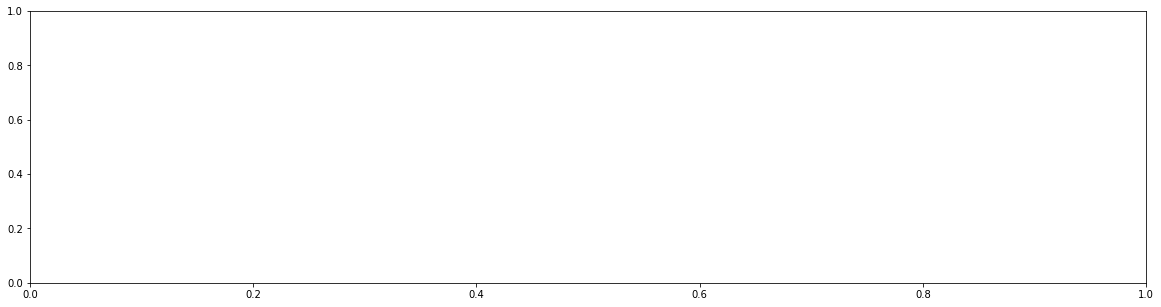

In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in range(ss.N):
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i])[:3], yrange=(pp,3), color=co)

In [9]:
request = 0
bathset = 0

TB = [np.zeros((ss.M)) for _ in range(ss.N)]
TS = [np.zeros((ss.H)) for _ in range(ss.N)]
TF = [0 for _ in range(ss.N)]

for h in range(ss.H + 1):
    
    i_prev = 0
    
    for i in range(ss.N):

        tb = TB[i]
        ts = TS[i]
        tf = 0

        tb_prev = TB[i_prev].copy()
        ts_prev = TS[i_prev].copy()
        tf_prev = TF[i_prev]
        
        if h == ss.H:
            start = ss.b[h - 1]
            end = ss.M
        
        elif h == 0:
            start = 0
            end = ss.b[h] # don't subtract 1, so it is included in the range

        else:
            start = ss.b[h - 1]
            end = ss.b[h]
            

        for j in range(start, end):

            if j == 0:

                if j + 1 in ss.b: # next to bath 0 is drying step h
                    tb[0] = ts_prev[0]
                    ts[0] = tb[0] + ss.tin[i][0]

                else:
                    tb[0] = tb_prev[1]

            elif j < ss.M - 1:

                if j in ss.b: # bath j is preceded by a drying step

                    if j + 1 in ss.b:

                        tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], ts_prev[h])
                        ts[h] = tb[j] + ss.tin[i][j]

                    else:
                        tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], tb_prev[j + 1])

                else:

                    if j + 1 in ss.b:                            
                        tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], ts_prev[h])
                        ts[h] = tb[j] + ss.tin[i][j]

                    else:
                        tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tb_prev[j + 1])

                    if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                        dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                        for k in reversed(range(start, j)):
                            if k in ss.b or k == 0:
                                tb[k:j] += dif
                                break
                            else:
                                shift = tb[k - 1] - tb[k] + ss.tax[i][k - 1]
                                tb[k:j] += min(dif, shift)
                                dif -= shift
                                if dif <= 0:
                                    break


            else:

                if j in ss.b:
                    tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], tf_prev)

                else:
                    tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tf_prev)

                    if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                        dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                        for k in reversed(range(start, j)):
                            if k in ss.b or k == 0:
                                tb[k:j] += dif
                                break
                            else:
                                shift = tb[k - 1] - tb[k] + ss.tax[i][k - 1]
                                tb[k:j] += min(dif, shift)
                                dif -= shift
                                if dif <= 0:
                                    break

            if h == ss.H:
                tf = tb[ss.M - 1] + ss.tin[i][ss.M - 1]
            else:
                TS[i][h] = ts[h]

            i_prev = i
            
            TB[i][start:end] = tb[start:end]
            TF[i] = tf
            



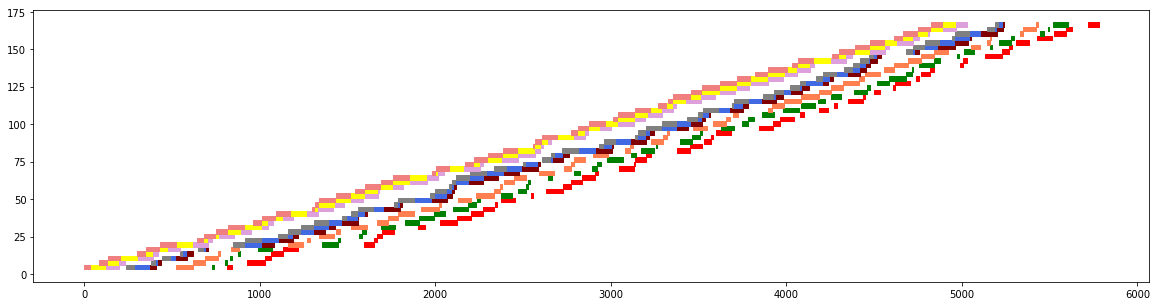

In [10]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in range(ss.N):
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

In [32]:
_tb, _ts, _tf, _order = ss.assign_all(14, 1)


In [33]:
OM = np.zeros(shape=(ss.N, ss.H + 1), dtype='int')

pos = -1
for i in _order:
    pos += 1
    OM[pos,:] = [i for _ in range(ss.H + 1)]

In [34]:
OM[:,0]

array([14,  3, 30, 45, 23, 17, 36, 47, 27, 51, 33, 29, 53, 11,  1,  7, 43,
       12, 52, 50, 42, 46, 18, 54,  4, 38, 44,  0, 49,  6, 28,  8, 24, 48,
       16,  2, 25, 20, 35, 31, 39, 40, 34, 37, 19, 26, 41, 15, 32,  9, 10,
       13, 22,  5, 21])

In [19]:
request = 0
bathset = 0

TB = [np.zeros((ss.M)) for _ in range(ss.N)]
TS = [np.zeros((ss.H)) for _ in range(ss.N)]
TF = [0 for _ in range(ss.N)]

for h in range(ss.H + 1):
    
    i_prev = 0
    
    for i in OM[:,h]:

        tb = TB[i]
        ts = TS[i]
        tf = 0

        tb_prev = TB[i_prev].copy()
        ts_prev = TS[i_prev].copy()
        tf_prev = TF[i_prev]
        
        if h == ss.H:
            start = ss.b[h - 1]
            end = ss.M
        
        elif h == 0:
            start = 0
            end = ss.b[h] # don't subtract 1, so it is included in the range

        else:
            start = ss.b[h - 1]
            end = ss.b[h]
            

        for j in range(start, end):

            if j == 0:

                if j + 1 in ss.b: # next to bath 0 is drying step h
                    tb[0] = ts_prev[0]
                    ts[0] = tb[0] + ss.tin[i][0]

                else:
                    tb[0] = tb_prev[1]

            elif j < ss.M - 1:

                if j in ss.b: # bath j is preceded by a drying step

                    if j + 1 in ss.b:

                        tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], ts_prev[h])
                        ts[h] = tb[j] + ss.tin[i][j]

                    else:
                        tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], tb_prev[j + 1])

                else:

                    if j + 1 in ss.b:                            
                        tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], ts_prev[h])
                        ts[h] = tb[j] + ss.tin[i][j]

                    else:
                        tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tb_prev[j + 1])

                    if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                        dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                        for k in reversed(range(start, j)):
                            if k in ss.b or k == 0:
                                tb[k:j] += dif
                                break
                            else:
                                shift = tb[k - 1] - tb[k] + ss.tax[i][k - 1]
                                tb[k:j] += min(dif, shift)
                                dif -= shift
                                if dif <= 0:
                                    break


            else:

                if j in ss.b:
                    tb[j] = max(ts[h - 1] + ss.sec[i][h - 1], tf_prev)

                else:
                    tb[j] = max(tb[j - 1] + ss.tin[i][j - 1], tf_prev)

                    if tb[j] - tb[j - 1] > ss.tax[i][j - 1]:

                        dif = tb[j] - tb[j - 1] - ss.tax[i][j - 1]

                        for k in reversed(range(start, j)):
                            if k in ss.b or k == 0:
                                tb[k:j] += dif
                                break
                            else:
                                shift = tb[k - 1] - tb[k] + ss.tax[i][k - 1]
                                tb[k:j] += min(dif, shift)
                                dif -= shift
                                if dif <= 0:
                                    break               
                

        if h == ss.H:
            tf = tb[ss.M - 1] + ss.tin[i][ss.M - 1]
        else:
            TS[i][h] = ts[h]

        i_prev = i

        TB[i][start:end] = tb[start:end]
        TF[i] = tf
            



IndexError: index 14 is out of bounds for axis 0 with size 9

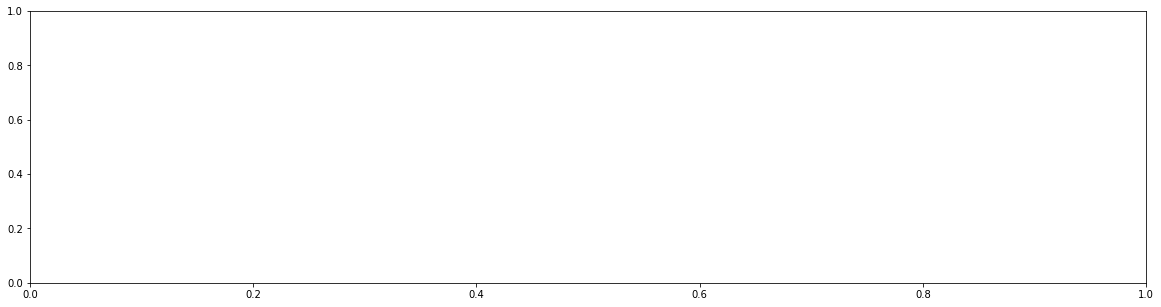

In [31]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

In [14]:
request = 0
bathset = 0

TB = [np.zeros((ss.M)) for _ in range(ss.N)]
TS = [np.zeros((ss.H)) for _ in range(ss.N)]
TF = [0 for _ in range(ss.N)]

for h in range(ss.H + 1):
    
    i_prev = 0
    
    for i in OM[:,h]:

        TB, TS, TF = ss.assign_new_set(TB, TS, TF, i, h, i_prev)
        
        i_prev = i

print(max(TF))

5097.0


IndexError: index 14 is out of bounds for axis 0 with size 9

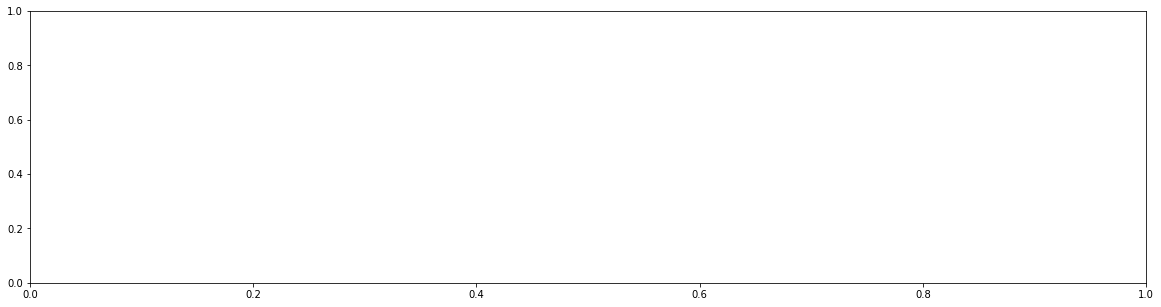

In [41]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

In [23]:
import random

In [24]:
OM = np.zeros(shape=(ss.N, ss.H + 1), dtype='int')

pos = -1
for i in _order:
    pos += 1
    OM[pos,:] = [i for _ in range(ss.H + 1)]

In [42]:
cnt = 0
best = 10000
while cnt < 200:
    cnt += 1
    
    TB = [np.zeros((ss.M)) for _ in range(ss.N)]
    TS = [np.zeros((ss.H)) for _ in range(ss.N)]
    TF = [0 for _ in range(ss.N)]
    
    OM[cnt,h:], OM[cnt+1,h:] =  OM[cnt+1,h:].copy(), OM[cnt,h:].copy()

    for h in range(ss.H + 1):

        i_prev = 0

        for i in OM[:,h]:

            TB, TS, TF = ss.assign_new_set(TB, TS, TF, i, h, i_prev)

            i_prev = i
    
    if max(TF) < best:
        best = max(TF)
        OMb = OM.copy()
    else:
        OM = OMb.copy()
        
    print(max(TF))

IndexError: index 14 is out of bounds for axis 0 with size 9

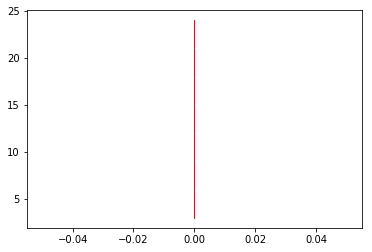

In [19]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order[:7]:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

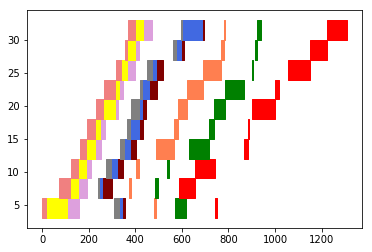

In [93]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order[:10]:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

In [20]:
max(TF)

0

In [86]:
OM[1,1:] = 30
OM[2,1:] = 14
OM

array([[14,  3,  3,  3,  3],
       [ 3, 30, 30, 30, 30],
       [30, 14, 14, 14, 14],
       [45, 45, 45, 45, 45],
       [23, 23, 23, 23, 23],
       [17, 17, 17, 17, 17],
       [36, 36, 36, 36, 36],
       [47, 47, 47, 47, 47],
       [27, 27, 27, 27, 27],
       [51, 51, 51, 51, 51],
       [33, 33, 33, 33, 33],
       [29, 29, 29, 29, 29],
       [53, 53, 53, 53, 53],
       [11, 11, 11, 11, 11],
       [ 1,  1,  1,  1,  1],
       [ 7,  7,  7,  7,  7],
       [43, 43, 43, 43, 43],
       [12, 12, 12, 12, 12],
       [52, 52, 52, 52, 52],
       [50, 50, 50, 50, 50],
       [42, 42, 42, 42, 42],
       [46, 46, 46, 46, 46],
       [18, 18, 18, 18, 18],
       [54, 54, 54, 54, 54],
       [ 4,  4,  4,  4,  4],
       [38, 38, 38, 38, 38],
       [44, 44, 44, 44, 44],
       [ 0,  0,  0,  0,  0],
       [49, 49, 49, 49, 49],
       [ 6,  6,  6,  6,  6],
       [28, 28, 28, 28, 28],
       [ 8,  8,  8,  8,  8],
       [24, 24, 24, 24, 24],
       [48, 48, 48, 48, 48],
       [16, 16

In [99]:
TB = [np.zeros((ss.M)) for _ in range(ss.N)]
TS = [np.zeros((ss.H)) for _ in range(ss.N)]
TF = [0 for _ in range(ss.N)]


i_prev = 0
h = 0
for i in OM[:,h]:

    TB, TS, TF = ss.assign_new_set(TB, TS, TF, i, h, i_prev)

    i_prev = i
    
for i in OM[:,h]:
    

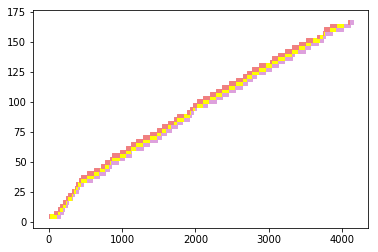

In [102]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i])[:3], yrange=(pp,3), color=co)

In [165]:
ps.write_output(TB, TS, TF, [6000, 5097], [15, 20], 8)

In [22]:
OM = np.zeros(shape=(ss.N, ss.H + 1), dtype='int')

pos = -1
for i in _order:
    pos += 1
    OM[pos,:] = [i for _ in range(ss.H + 1)]

In [21]:
pos1 = 0
order = list(range(ss.N))

In [25]:
order[pos1], order[pos1 + 1] = order[pos1 + 1], order[pos1]
pos1 +=1

In [45]:
OM0 = OM.copy()
cnt = 0
_h = 0
while cnt < 20:
    
    cnt += 1
    
    OM1 = OM0[order,:]
    
    TB = [np.zeros((ss.M)) for _ in range(ss.N)]
    TS = [np.zeros((ss.H)) for _ in range(ss.N)]
    TF = [0 for _ in range(ss.N)]

    for h in range(ss.H + 1):

        i_prev = 0

        for i in OM1[:,h]:

            TB, TS, TF = ss.assign_new_set(TB, TS, TF, i, h, i_prev)

            i_prev = i
    
    if max(TF) < best:
        best = max(TF)
        OM0 = OM1.copy()
    
    if cnt == 20:
        _h +=1
        pos1 = 0
        order = list(range(ss.N))
        cnt = 0
        
    print(_h, max(TF))
    order[pos1], order[pos1 + 1] = order[pos1 + 1], order[pos1]
    pos1 +=1

IndexError: index 14 is out of bounds for axis 0 with size 9

In [1]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in _order:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

NameError: name 'plt' is not defined

In [39]:
OM

array([[14, 14, 14, 14, 14],
       [ 3,  3,  3,  3,  3],
       [30, 30, 30, 30, 30],
       [45, 45, 45, 45, 45],
       [23, 23, 23, 23, 23],
       [17, 17, 17, 17, 17],
       [36, 36, 36, 36, 36],
       [47, 47, 47, 47, 47],
       [27, 27, 27, 27, 27],
       [51, 51, 51, 51, 51],
       [33, 33, 33, 33, 33],
       [29, 29, 29, 29, 29],
       [53, 53, 53, 53, 53],
       [11, 11, 11, 11, 11],
       [ 1,  1,  1,  1,  1],
       [ 7,  7,  7,  7,  7],
       [43, 43, 43, 43, 43],
       [12, 12, 12, 12, 12],
       [52, 52, 52, 52, 52],
       [50, 50, 50, 50, 50],
       [42, 42, 42, 42, 42],
       [46, 46, 46, 46, 46],
       [18, 18, 18, 18, 18],
       [54, 54, 54, 54, 54],
       [ 4,  4,  4,  4,  4],
       [38, 38, 38, 38, 38],
       [44, 44, 44, 44, 44],
       [ 0,  0,  0,  0,  0],
       [49, 49, 49, 49, 49],
       [ 6,  6,  6,  6,  6],
       [28, 28, 28, 28, 28],
       [ 8,  8,  8,  8,  8],
       [24, 24, 24, 24, 24],
       [48, 48, 48, 48, 48],
       [16, 16

In [43]:
TB = [np.zeros((ss.M)) for _ in range(ss.N)]
TS = [np.zeros((ss.H)) for _ in range(ss.N)]
TF = [0 for _ in range(ss.N)]
i_prev = 0

for i in OM[:,0]:
    TB[i], TS[i], TF[i] = ss.assign_new_set(TB, TS, TF, i, 0, i_prev)
    i_prev = i

TB[14], TS[14], TF[14] = ss.assign_new_set(TB, TS, TF, 14, 1, 0)

unused_req = set(OM[:,1]) - {14}

for ii in OM[:,1]:
    ds=[]
    ds_best = 10000000000
    
    for i in OM[:,1]:
        if i != ii and i in unused_req:
            
            tb, ts, tf = ss.assign_new_set(TB, TS, TF, i, 1, i_prev)
            ds.append(ss.dissimilarity(TB[i_prev], TS[i_prev], TF[i_prev], tb, ts, tf) * ts[1])

            if ds[-1] < ds_best:
                ds_best = ds[-1]
                i_best = i
            
    unused_req -= {i_best}
    TB[i_best], TS[i_best], TF[i_best] = ss.assign_new_set(TB, TS, TF, i_best, 1, ii)
    i_prev = i_best

i_prev = 0
h = 2
for i in OM[:,h]:
    TB[i], TS[i], TF[i] = ss.assign_new_set(TB, TS, TF, i, h, i_prev)
    i_prev = i

i_prev = 0
h = 3
for i in OM[:,h]:
    TB[i], TS[i], TF[i] = ss.assign_new_set(TB, TS, TF, i, h, i_prev)
    i_prev = i
    
i_prev = 0
h = 4
for i in OM[:,h]:
    TB[i], TS[i], TF[i] = ss.assign_new_set(TB, TS, TF, i, h, i_prev)
    i_prev = i

In [104]:
TB[14], TS[14], TF[14] = ss.assign_new_set(TB, TS, TF, 14, 1, 0)

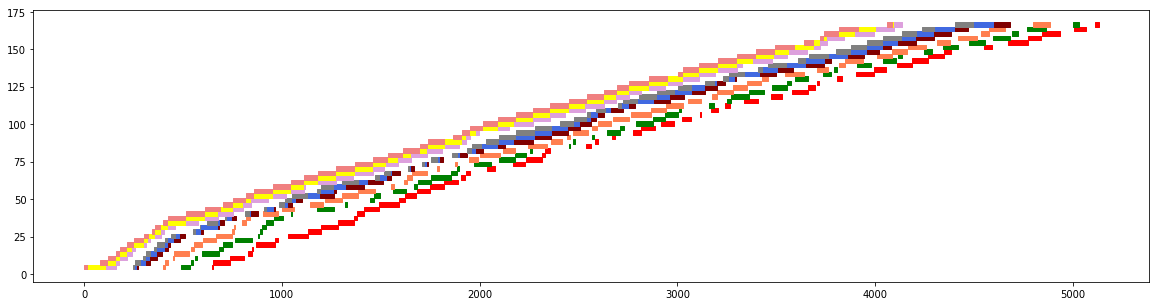

In [44]:
fig, ax = plt.subplots()
co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

pp = 0

for i in OM[:,0]:
    pp += 3
    ax.broken_barh(ss.compute_Vb(TB[i], TS[i], TF[i]), yrange=(pp,3), color=co)

In [ ]:
ps.write_output(TB, TS, )

In [100]:
ss.compute_Vb(TB[14], TS[14], TF[14])

[(0.0, 20.0),
 (20.0, 92.0),
 (112.0, 48.0),
 (246.0, 13.0),
 (259.0, 9.0),
 (268.0, 7.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0)]